In [1]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [3]:
directory ="/Users/huiwen/Documents/Side Projects/Omdena/omdena-colombia-socialnetwork/Untitled/src/data/task-3-exploratory-data-analysis/Corrected_Final_All.csv"
df = pd.read_csv(directory)
df.head()

,Unnamed: 0,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,favorite_count,...,preprocessed_data,emoji_list,emoticons_list,filename,data_source,lang,score,langTb,lang_langdetect,preprocessed_data_without_hashtags
0,0,2021-03-27T04:09:42+00:00,1.380000e+18,1.380000e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,1.0,...,"['hacer', 'mayo', 'cazar', 'fantasma', 'mayo']",[''],[':/'],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['hacer', 'mayo', 'cazar', 'fantasma']"
1,1,2021-03-22T21:12:09+00:00,1.370000e+18,1.370000e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,4.0,...,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",['💙🤍💙'],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['despues', 'esperar', 'ancia', 'ahora', 'espe..."
2,2,2021-03-22T12:30:53+00:00,1.370000e+18,1.370000e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,1.0,...,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",[''],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia..."
3,3,2021-04-04T12:56:55+00:00,1.380000e+18,1.380000e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,5.0,...,"['menos', 'mes', 'mayo', 'urkullu', 'temer', '...",[''],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['menos', 'mes', 'urkullu', 'temer', 'perder',..."
4,4,2021-04-03T20:14:57+00:00,1.380000e+18,1.380000e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,3.0,...,"['edicion', 'festival', 'internacional', 'puen...",[''],"[':/', ':/']",Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,"['edicion', 'festival', 'internacional', 'puen..."


In [4]:
# df.info()

## 1. Top Words

<AxesSubplot:>

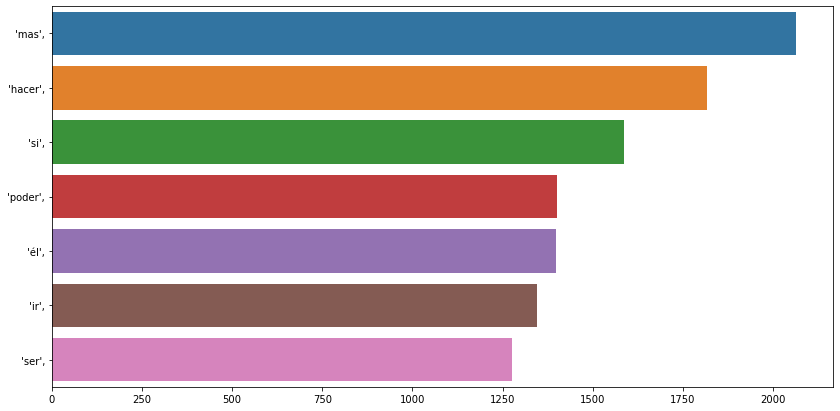

In [5]:
plt.figure(figsize = (14,7))
words = df[df["preprocessed_data_without_hashtags"] != ""]
words = [word for xIndex, x in words.iterrows() for word in x["preprocessed_data_without_hashtags"].split()]
# print(words)
counter = Counter(words)
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x)

## 2. n-gram

In [6]:
# processed list of words to str
df['preprocessed_data_without_hashtags'] = df['preprocessed_data_without_hashtags'].apply(eval).apply(' '.join)
df.head()

,Unnamed: 0,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,favorite_count,...,preprocessed_data,emoji_list,emoticons_list,filename,data_source,lang,score,langTb,lang_langdetect,preprocessed_data_without_hashtags
0,0,2021-03-27T04:09:42+00:00,1.380000e+18,1.380000e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,1.0,...,"['hacer', 'mayo', 'cazar', 'fantasma', 'mayo']",[''],[':/'],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,hacer mayo cazar fantasma
1,1,2021-03-22T21:12:09+00:00,1.370000e+18,1.370000e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,4.0,...,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",['💙🤍💙'],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,despues esperar ancia ahora esperar despues se...
2,2,2021-03-22T12:30:53+00:00,1.370000e+18,1.370000e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,1.0,...,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",[''],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,esperar llegar oido nuevo iniciar laboral part...
3,3,2021-04-04T12:56:55+00:00,1.380000e+18,1.380000e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,5.0,...,"['menos', 'mes', 'mayo', 'urkullu', 'temer', '...",[''],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,menos mes urkullu temer perder control dar pas...
4,4,2021-04-03T20:14:57+00:00,1.380000e+18,1.380000e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,3.0,...,"['edicion', 'festival', 'internacional', 'puen...",[''],"[':/', ':/']",Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,edicion festival internacional puente hacia ce...


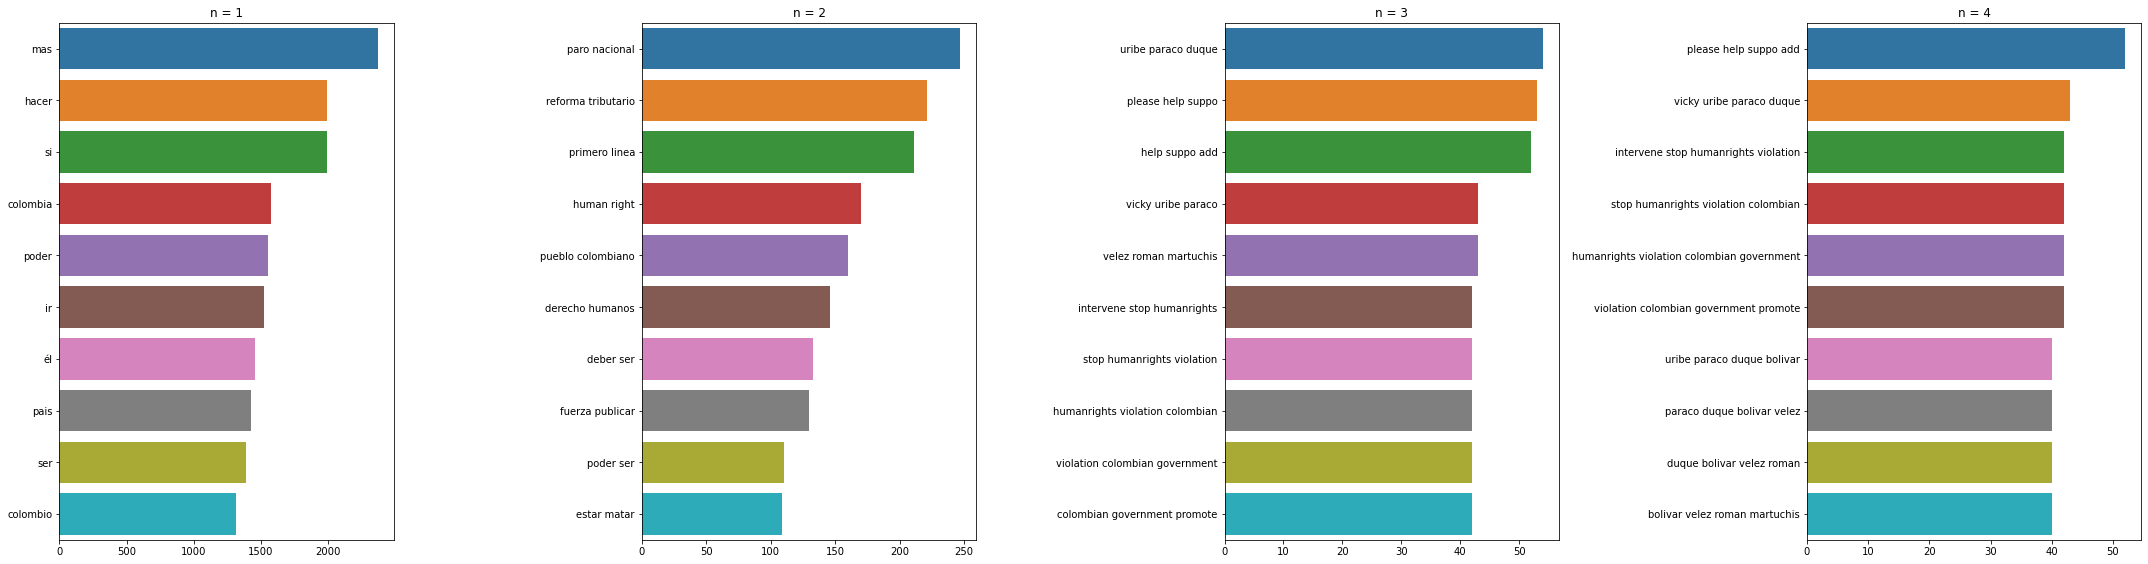

In [7]:
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:10]


fig, axs = plt.subplots(ncols = 4, figsize = (30, 8))
top_n_bigrams = get_top_ngram(df["preprocessed_data_without_hashtags"], 1)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[0])
top_n_bigrams = get_top_ngram(df["preprocessed_data_without_hashtags"], 2)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[1])
top_tri_grams=get_top_ngram(df["preprocessed_data_without_hashtags"], n = 3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x = y, y = x, ax = axs[2])
top_quad_grams=get_top_ngram(df["preprocessed_data_without_hashtags"], n = 4)
x,y = map(list, zip(*top_quad_grams))
sns.barplot(x = y, y = x, ax = axs[3])

axs[0].set_title("n = 1")
axs[1].set_title("n = 2")
axs[2].set_title("n = 3")
axs[3].set_title("n = 4")
fig.tight_layout(pad = 1.3)
# fig.savefig("ngram.png")

## 3. Word Cloud

#### Split English & Spanish

In [8]:
df_es = df[df['lang']=='es']
df_en = df[df['lang']=='en']
# df_es.info()

#### English Wordcloud

In [9]:
# processed list of words to str
# df_en['corrected_preprocessed'] = df_en['corrected_preprocessed'].apply(eval).apply(' '.join)
df_en.head()

,Unnamed: 0,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,favorite_count,...,preprocessed_data,emoji_list,emoticons_list,filename,data_source,lang,score,langTb,lang_langdetect,preprocessed_data_without_hashtags
16690,16690,2021-04-23T07:14:36+00:00,1.390000e+18,1.390000e+18,📢Join the seminar aiming at supporting #1May #...,en,False,False,5.0,4.0,...,"['join', 'seminar', 'aim', 'support', 'may', '...",['📢'],[],Mayo_ENGLISH_tweets_stweet.csv,Twitter,en,NaN,NaN,NaN,join seminar aim support trade union activity ...
16691,16691,2021-04-22T04:12:43+00:00,1.390000e+18,1.380000e+18,@julioacosta1701 @DiazCanelB @AlejandroGilF @r...,es,False,False,7.0,1.0,...,"['caliente', 'tweetazo', 'prevenirporlavida', ...",[],[],Mayo_ENGLISH_tweets_stweet.csv,Twitter,en,NaN,NaN,NaN,caliente tweetazo
16692,16692,2021-04-22T04:12:00+00:00,1.390000e+18,1.380000e+18,@julioacosta1701 @AliRubioGlez @Vicente7397772...,es,False,False,7.0,1.0,...,"['sumo', 'prevenirporlavida', 'patriaomuerte',...",[],[],Mayo_ENGLISH_tweets_stweet.csv,Twitter,en,NaN,NaN,NaN,sumo
16693,16693,2021-04-22T04:09:48+00:00,1.390000e+18,1.380000e+18,@AdrinMartnezGo1 @julioacosta1701 @DiazCanelB ...,es,False,False,6.0,0.0,...,"['hay', 'diocancancan', 'prevenirporlavida', '...",['😅😂🤣🤣'],[],Mayo_ENGLISH_tweets_stweet.csv,Twitter,en,NaN,NaN,NaN,hay diocancancan
16694,16694,2021-04-22T03:32:26+00:00,1.390000e+18,1.380000e+18,@VilmaPrez14 @Laura53538740 @Granma_Digital @D...,es,False,False,5.0,1.0,...,"['con', 'mucha', 'conciencia', 'prevenirporlav...",[],[],Mayo_ENGLISH_tweets_stweet.csv,Twitter,en,NaN,NaN,NaN,con mucha conciencia


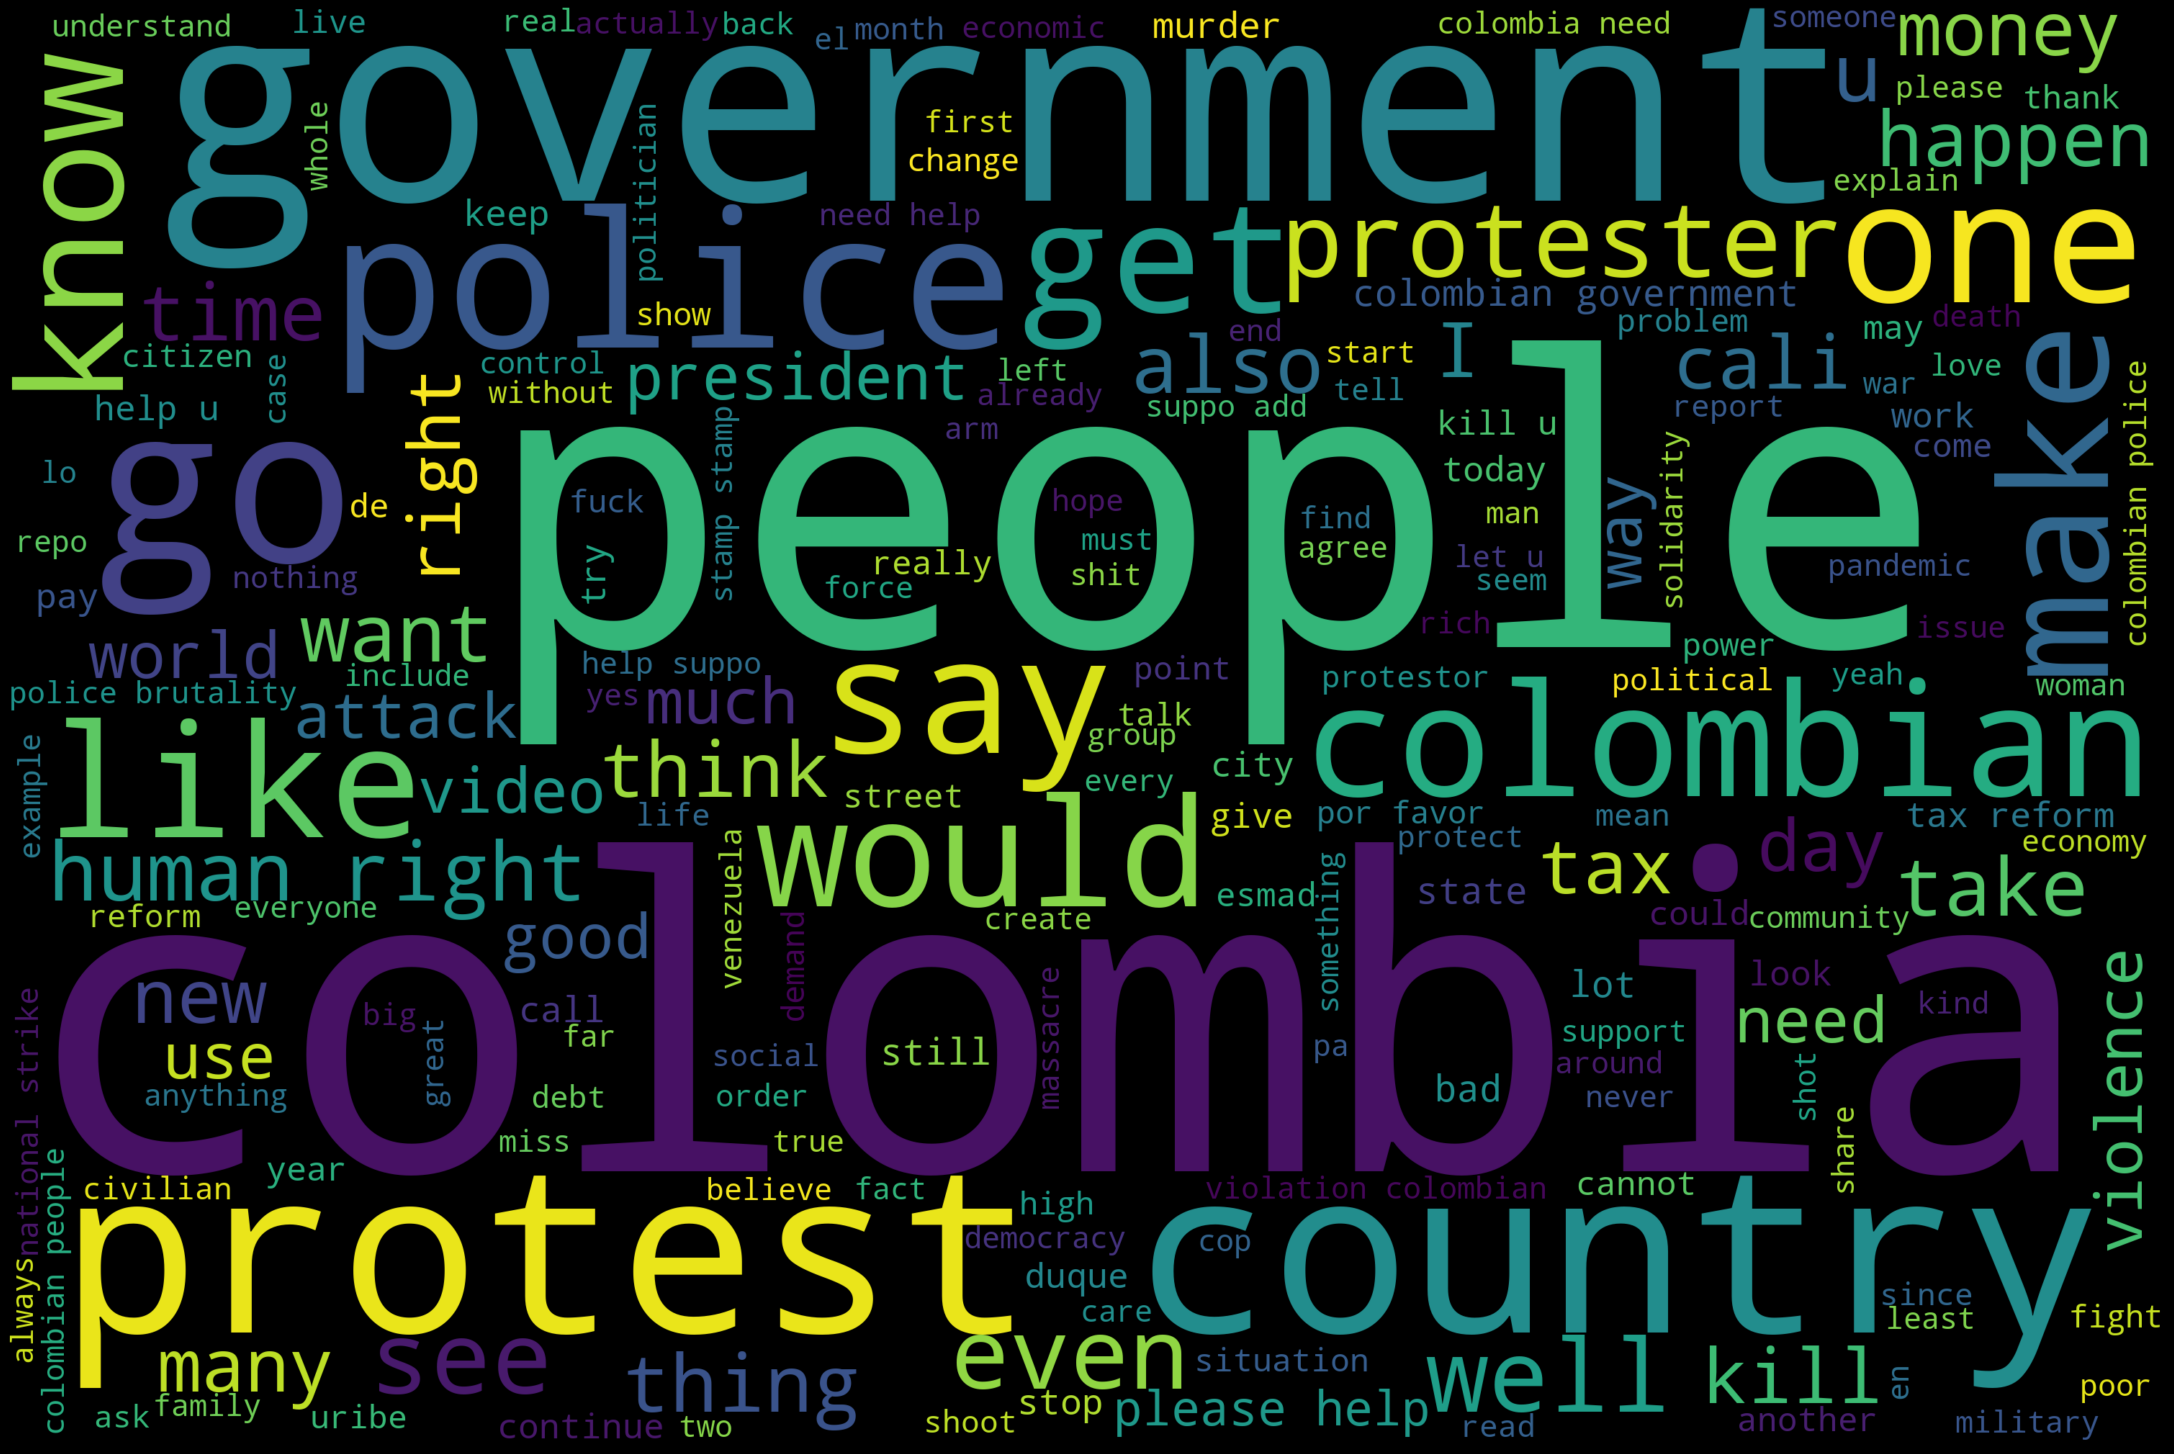

In [10]:
text = " ".join(tweet for tweet in  df_en.preprocessed_data_without_hashtags)
STOPWORDS = ["amp", "mayo","gazaunderattack'","palestinianlivesmatter",
             "israelterrorist""israelterrorists","save_sheikh_jarrah"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


#### Spanish Wordcloud

In [11]:
# processed list of words to str
# df_es['preprocessed_str_without_hashtags'] = df_es['preprocessed_data_without_hashtags'].apply(eval).apply(' '.join)
df_es.head()

,Unnamed: 0,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,favorite_count,...,preprocessed_data,emoji_list,emoticons_list,filename,data_source,lang,score,langTb,lang_langdetect,preprocessed_data_without_hashtags
0,0,2021-03-27T04:09:42+00:00,1.380000e+18,1.380000e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,1.0,...,"['hacer', 'mayo', 'cazar', 'fantasma', 'mayo']",[''],[':/'],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,hacer mayo cazar fantasma
1,1,2021-03-22T21:12:09+00:00,1.370000e+18,1.370000e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,4.0,...,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",['💙🤍💙'],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,despues esperar ancia ahora esperar despues se...
2,2,2021-03-22T12:30:53+00:00,1.370000e+18,1.370000e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,1.0,...,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",[''],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,esperar llegar oido nuevo iniciar laboral part...
3,3,2021-04-04T12:56:55+00:00,1.380000e+18,1.380000e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,5.0,...,"['menos', 'mes', 'mayo', 'urkullu', 'temer', '...",[''],[],Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,menos mes urkullu temer perder control dar pas...
4,4,2021-04-03T20:14:57+00:00,1.380000e+18,1.380000e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,3.0,...,"['edicion', 'festival', 'internacional', 'puen...",[''],"[':/', ':/']",Mayo_SPANISH_tweets_stweet.csv,Twitter,es,NaN,NaN,NaN,edicion festival internacional puente hacia ce...


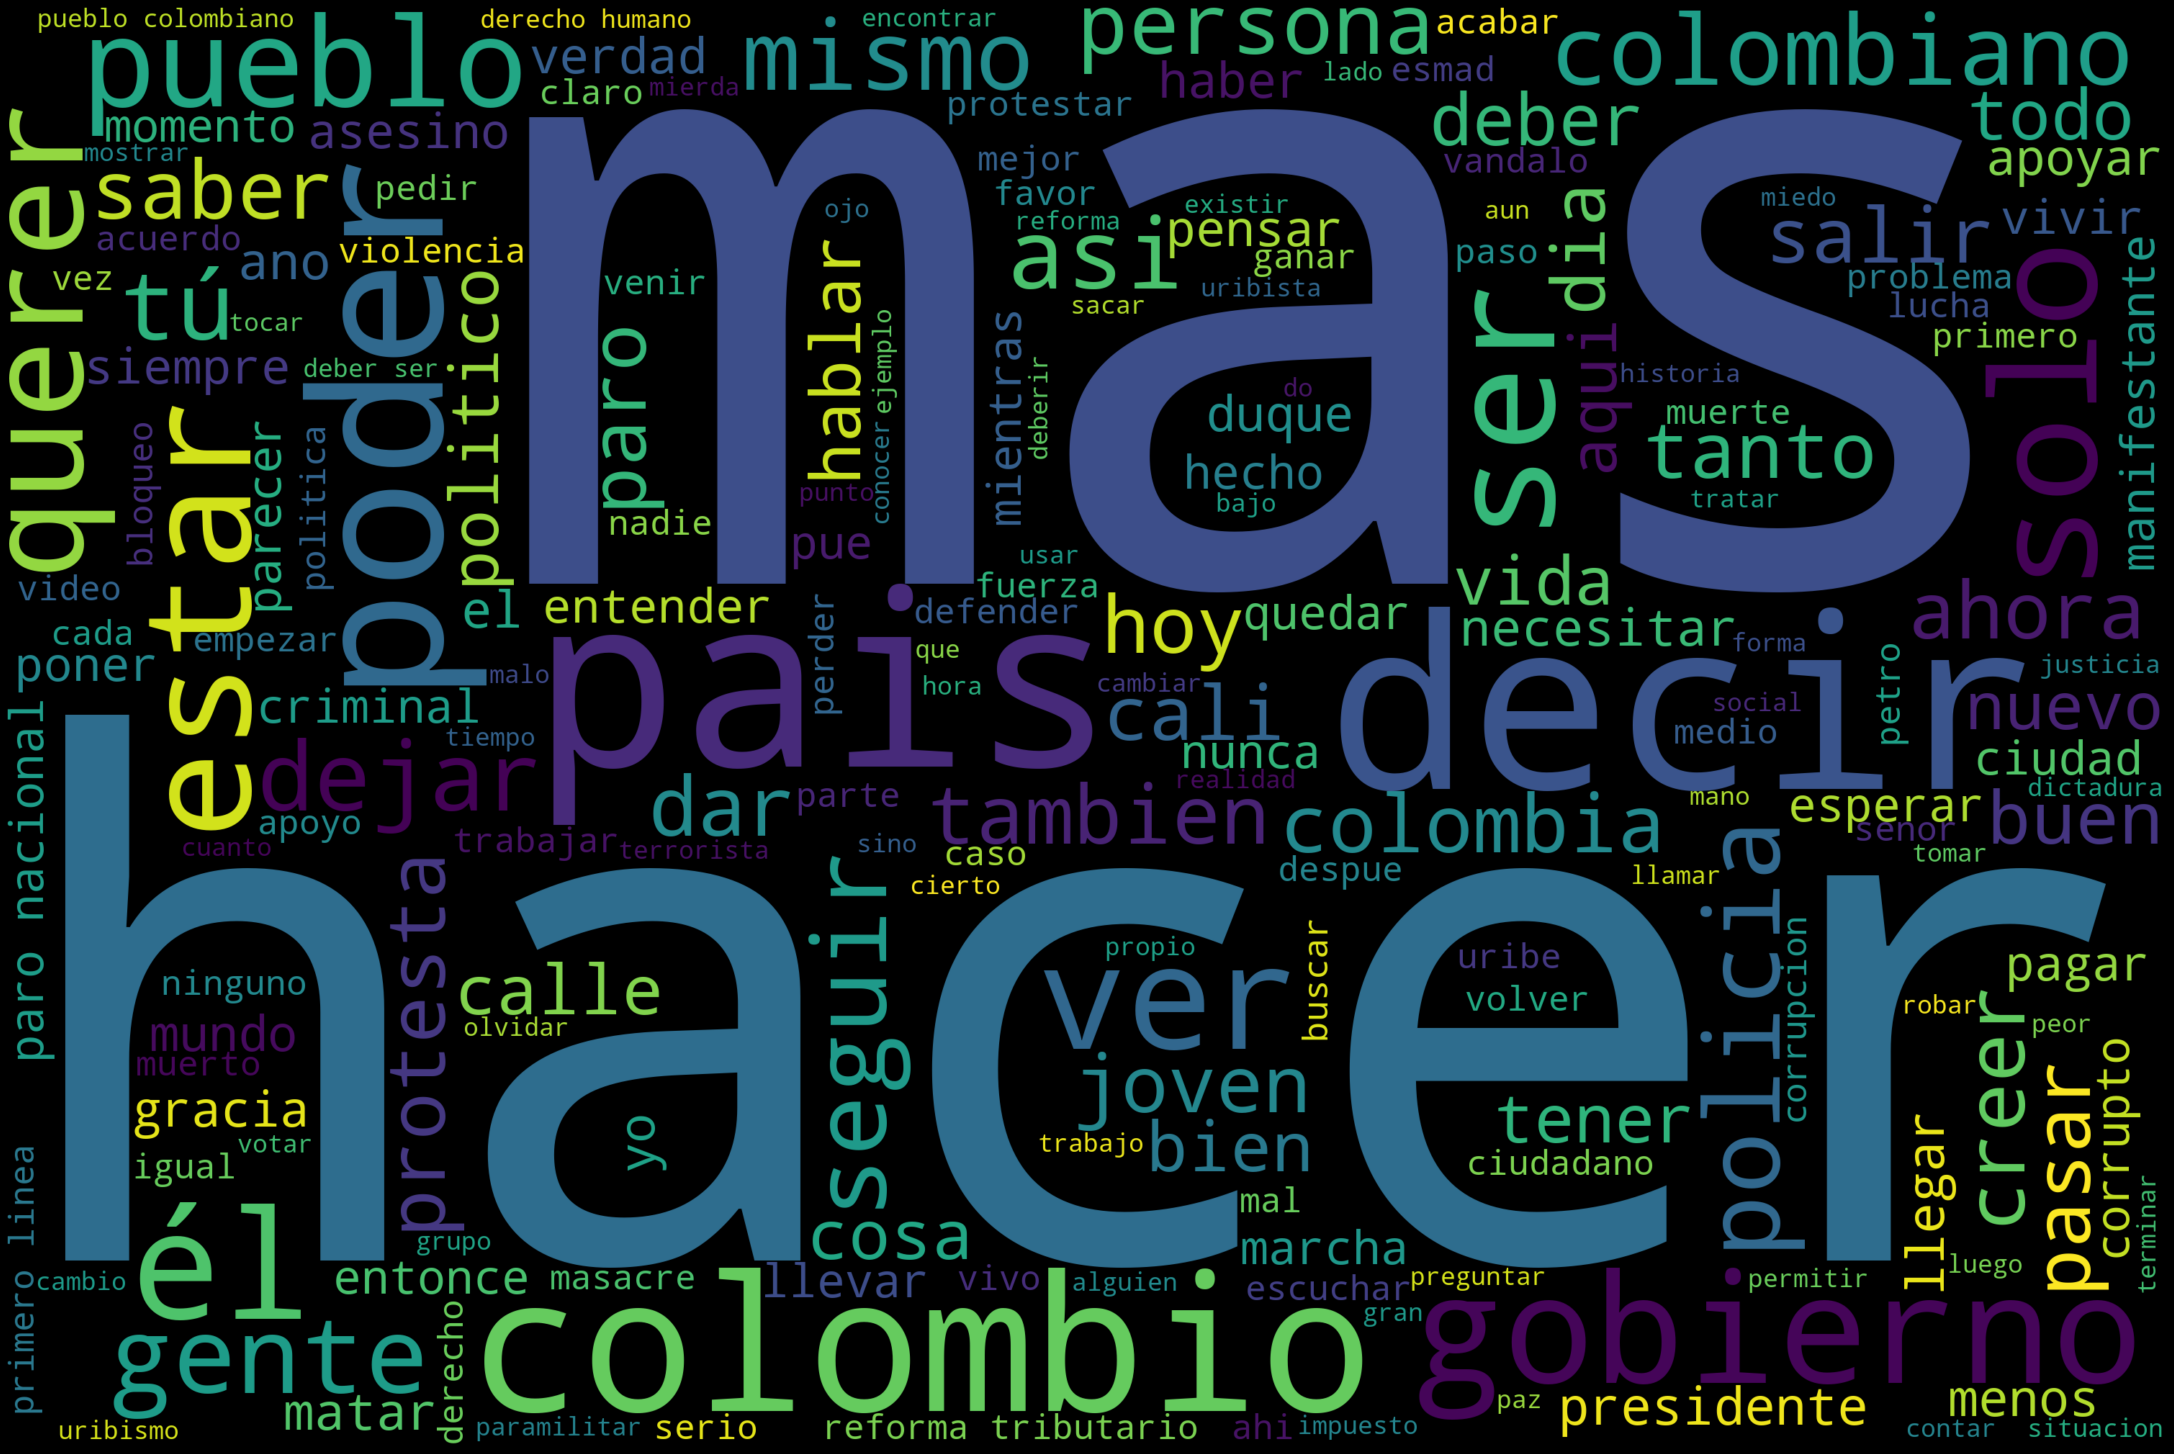

In [12]:
text = " ".join(tweet for tweet in  df_es.preprocessed_data_without_hashtags)
STOPWORDS = ["amp", "mayo","gazaunderattack'","palestinianlivesmatter",
             "israelterrorist""israelterrorists","save_sheikh_jarrah","si","ma","ir"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
